In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Question1 :  Write a function to increase the brightness of an image with image and brightness value as inputs. Verify the function using elephants.jpg.

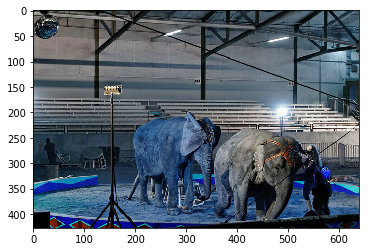

In [25]:
image=cv2.imread('practice_data/elephants.jpg')
plt.imshow(image)

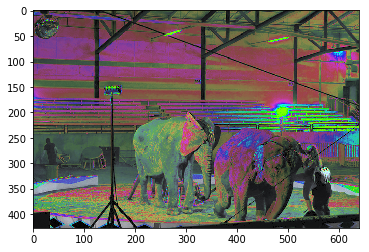

In [24]:
def image_brightness(image, value=20):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    #for handling overflow
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

brighter_image = image_brightness(image,value=20)
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)

plt.imshow(brighter_image)

#### Question 2: Create a custom function to translate an image without using any external library. Only use cv2 to load an image and numpy to do all the matrix operations. Verify the function using elephants.jpg

[[ 30  31  35]
 [ 34  35  39]
 [ 20  21  25]
 ...
 [107 131 143]
 [105 128 143]
 [104 127 143]]
[[255 255 255]
 [ 30  31  35]
 [ 34  35  39]
 ...
 [103 130 140]
 [107 131 143]
 [105 128 143]]


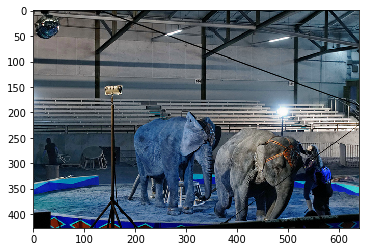

In [138]:
img = cv2.imread('practice_data/elephants.jpg')

print(img[0])

def shift_right_by_1(img):
    height = img.shape[0]
    width = img.shape[1];
    for i in range(height):
        for j in range(width-1,0,-1):
            img[i,j] = img[i,j-1]
        img[i,0]=np.array([255,255,255]) 
    return img

new_arr = shift_right_by_1(img)
print(new_arr[0])
plt.imshow(new_arr)


### How WarpAffine function works in Transation of Images

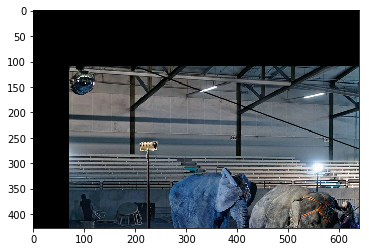

In [10]:
#Case 1 : Image shifts to right and the image is cut
img = cv2.imread('practice_data/elephants.jpg')
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))

plt.imshow(img_translation)


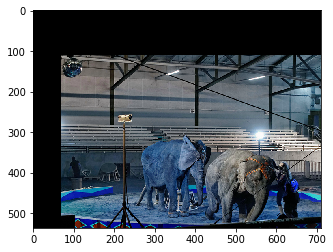

In [4]:
#Case 2 : Image shifts to right but we get the full image

img = cv2.imread('practice_data/elephants.jpg')
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
plt.imshow(img_translation)

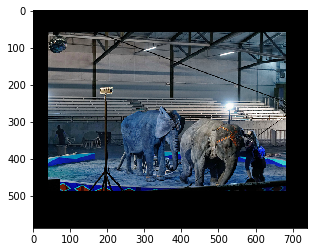

In [5]:
#Case 3 : Image shifts to the centre

img = cv2.imread('practice_data/elephants.jpg')
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))

plt.imshow(img_translation)

In [129]:
a = np.random.randint(10, size=(5,4))
print(a)

[[8 9 7 5]
 [5 2 2 6]
 [2 2 9 3]
 [7 8 3 4]
 [9 4 0 4]]


In [130]:
def shift_right_by_1(a):
    height = a.shape[0]
    width = a.shape[1];
    for i in range(height):
        for j in range(width-1,0,-1):
            a[i,j] = a[i,j-1]
        a[i,0]=0
    return a

new_arr = shift_right_by_1(a)
print(new_arr)

[[0 8 9 7]
 [0 5 2 2]
 [0 2 2 9]
 [0 7 8 3]
 [0 9 4 0]]


In [114]:
def shift_left_by_1(a):
    height = a.shape[0]
    width = a.shape[1];
    for i in range(height):
        for j in range(width-1):
            a[i,j] = a[i,j+1]
        a[i,width-1]=0
    return a

new_arr = shift_left_by_1(a)
print(new_arr)

[[1 3 4 0]
 [8 1 7 0]
 [7 0 5 0]
 [7 4 8 0]
 [8 0 8 0]]
